In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','availability'],axis='columns')
df2.shape

(13320, 6)

In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df2.shape

(13320, 6)

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
df3.shape

(12710, 6)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/var/folders/1g/slxt6dm10t1300d7h4sdv6_m0000gn/T/ipykernel_3581/2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [16]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


In [17]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [18]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [19]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

In [20]:
df5.to_csv("bhp.csv",index=False)

In [21]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: location, Length: 1248, dtype: int64

In [22]:
location_stats.values.sum()

12668

In [23]:
len(location_stats[location_stats>10])

235

In [24]:
len(location_stats)

1248

In [25]:
len(location_stats[location_stats<=10])

1013

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: location, Length: 1013, dtype: int64

In [27]:
len(df5.location.unique())

1248

In [28]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

236

In [29]:
df5.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [30]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [31]:
df5.shape

(12668, 8)

In [32]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12013, 8)

In [33]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9852, 8)

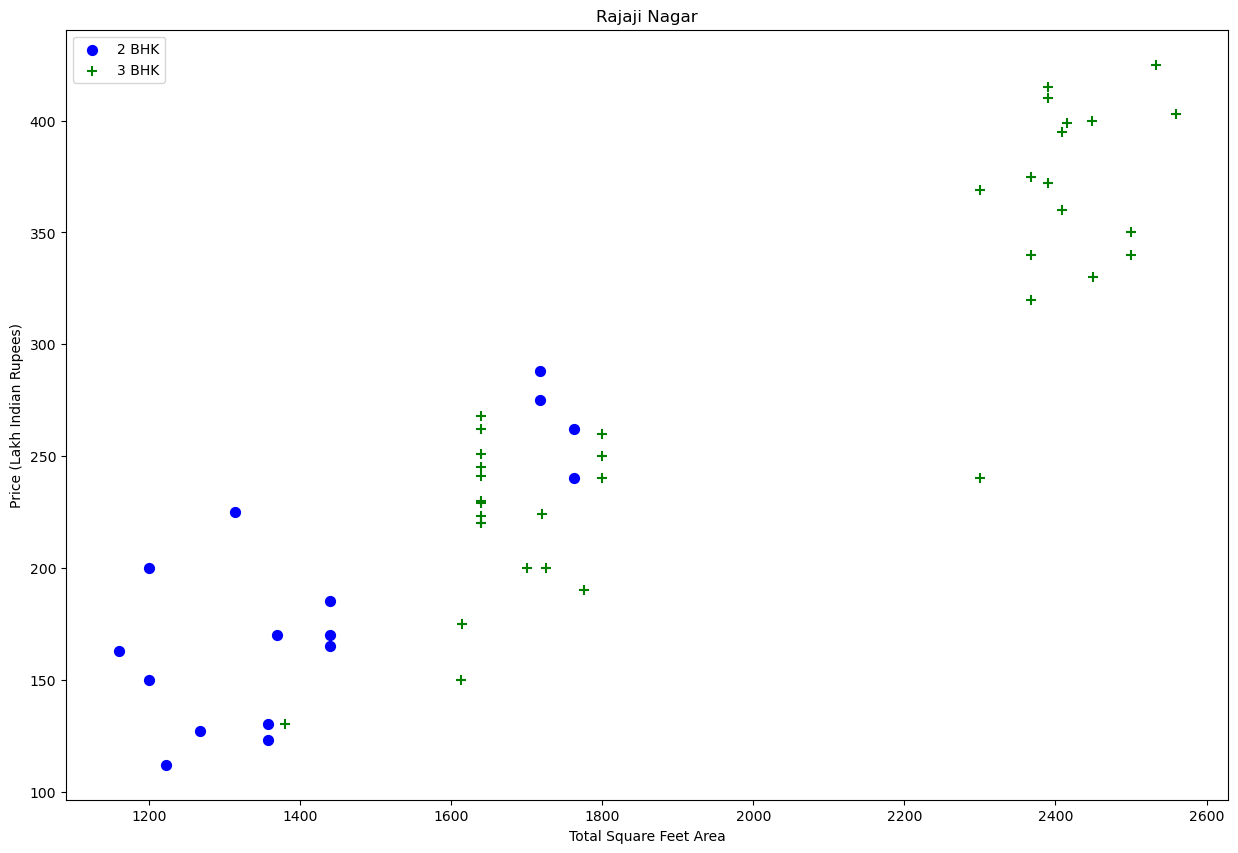

In [35]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

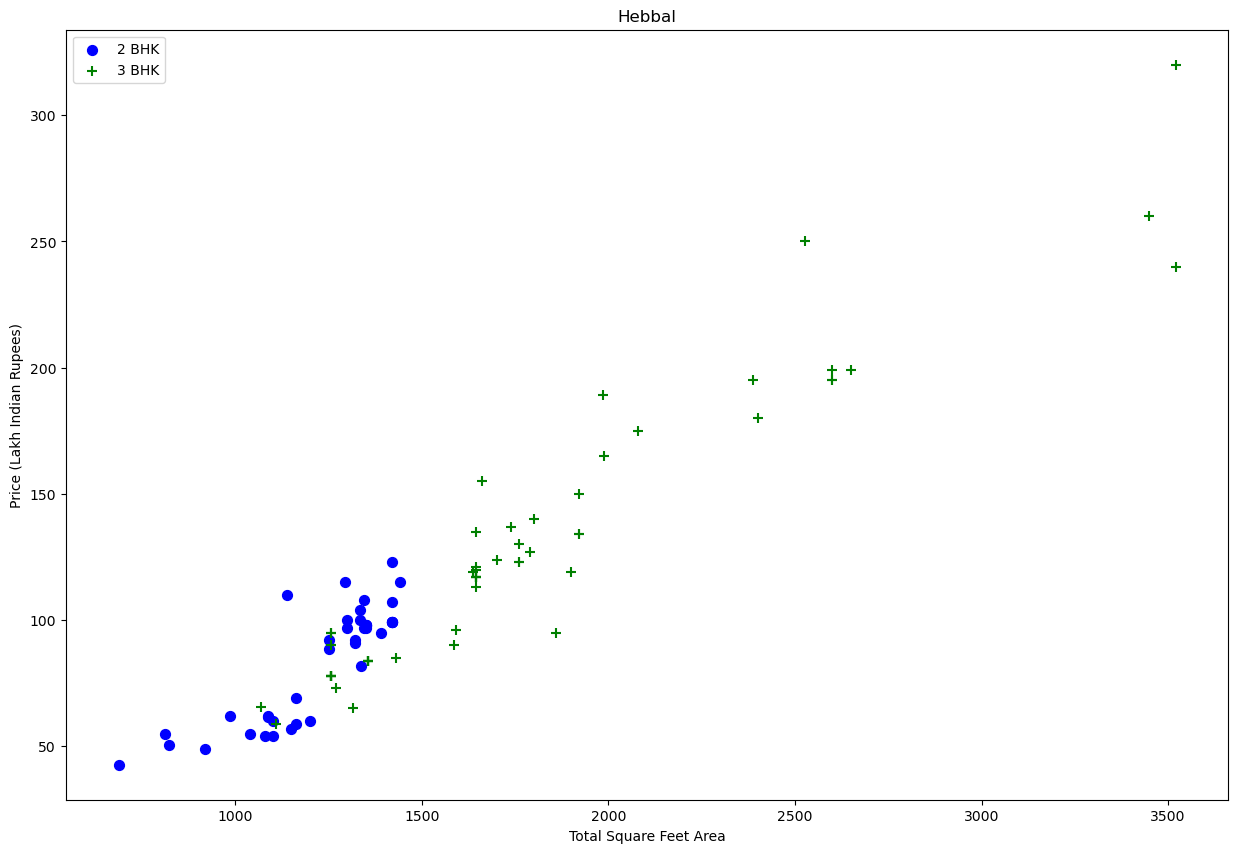

In [36]:
plot_scatter_chart(df7,"Hebbal")

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7014, 8)

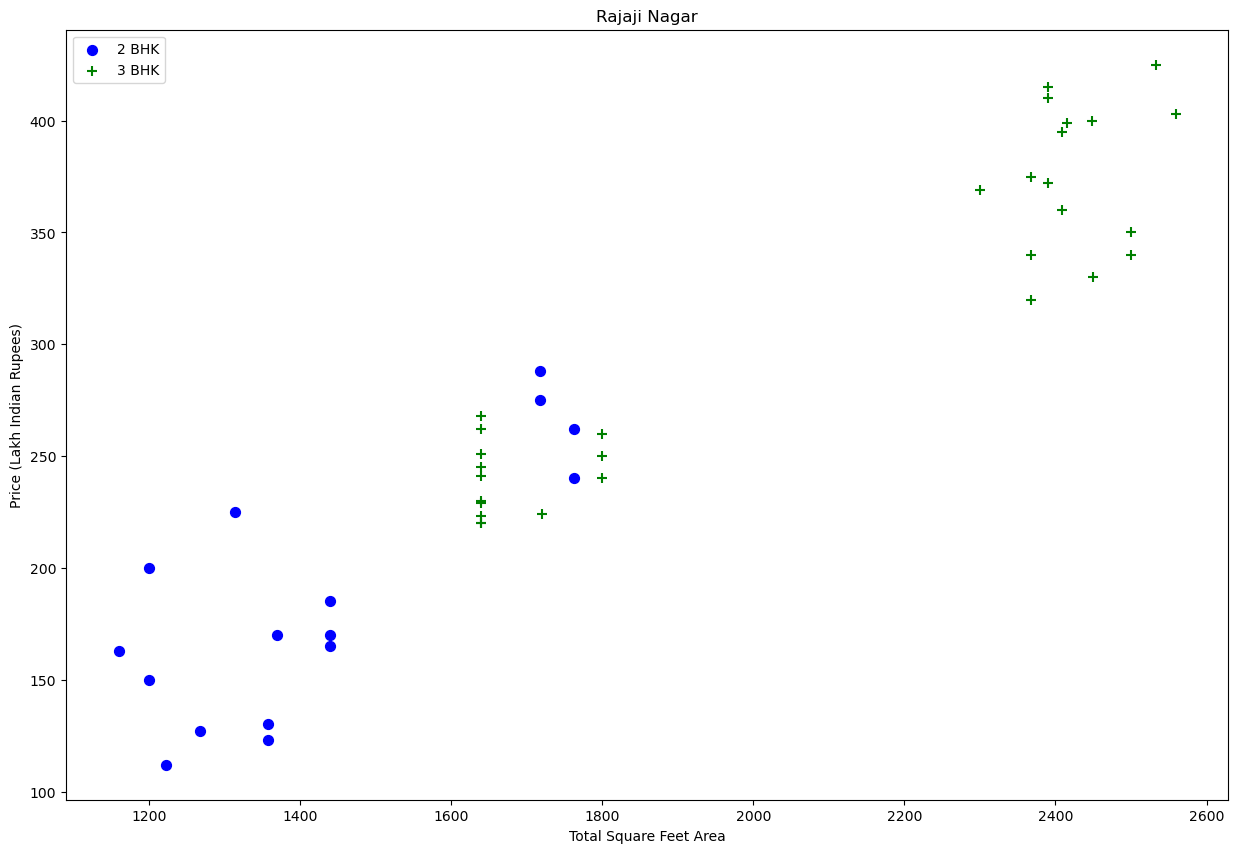

In [38]:
plot_scatter_chart(df8,"Rajaji Nagar")

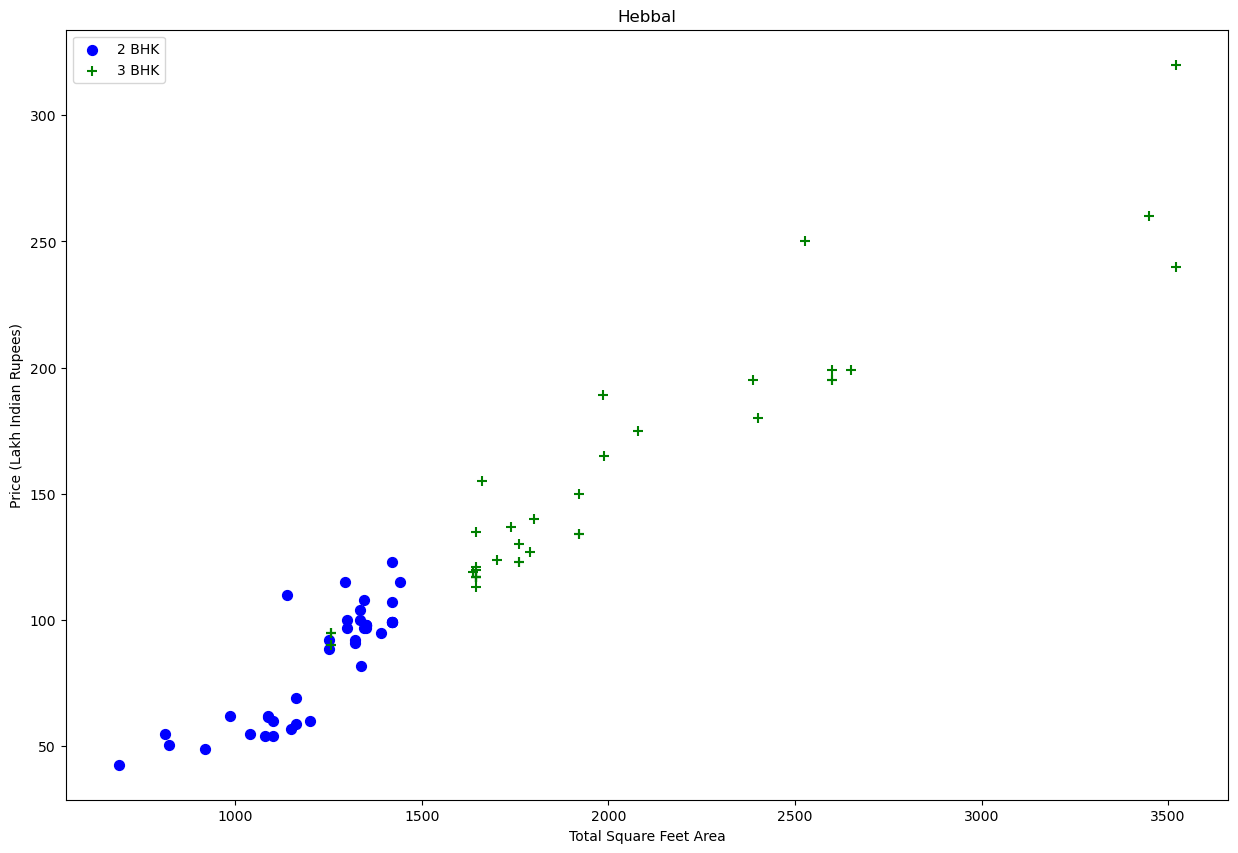

In [39]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

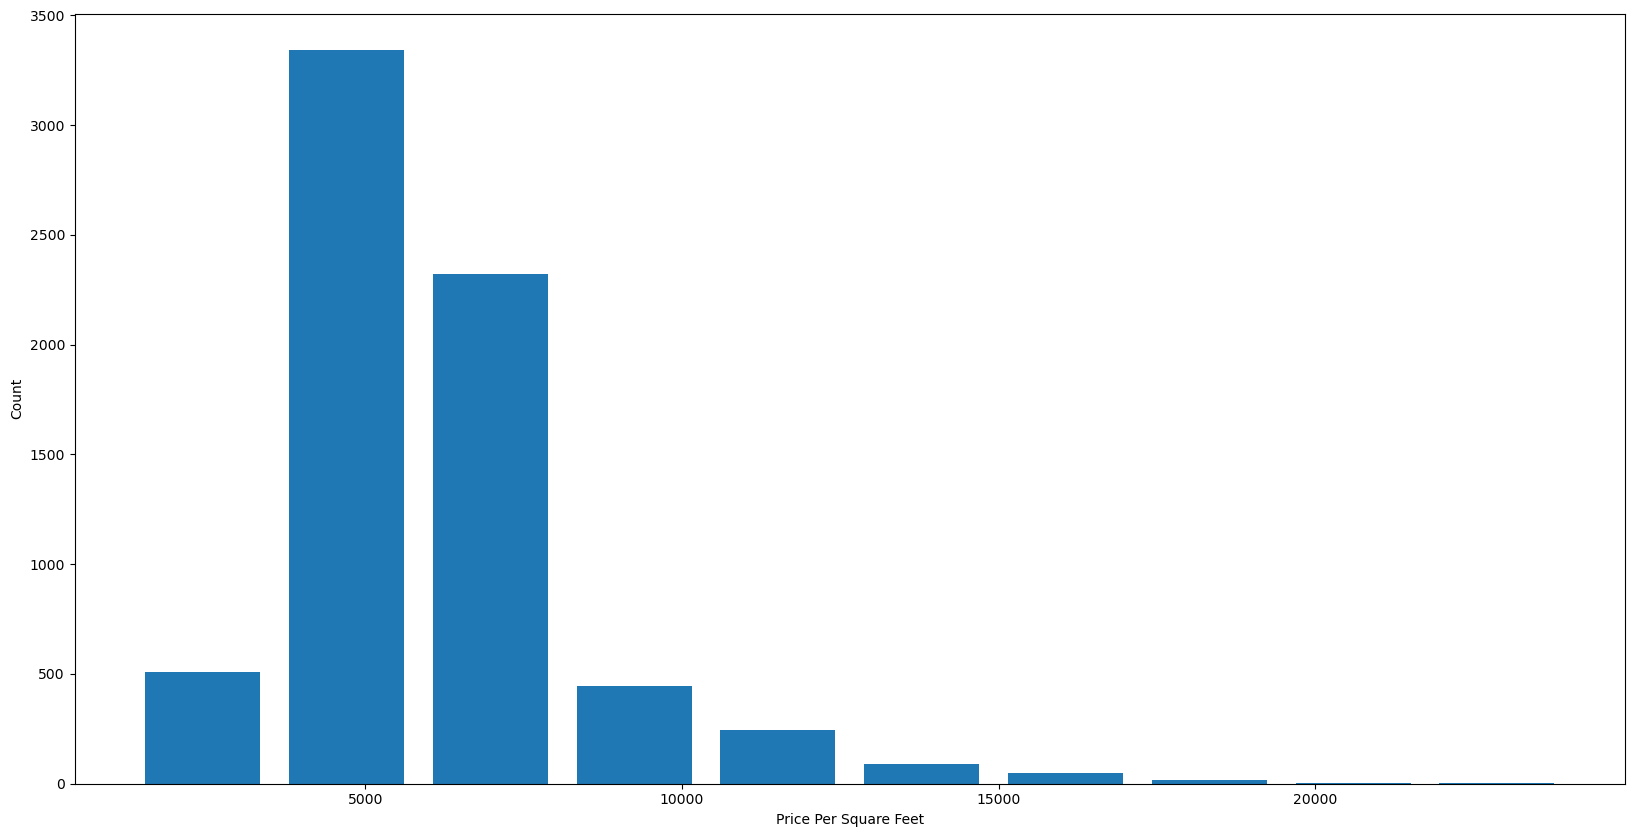

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

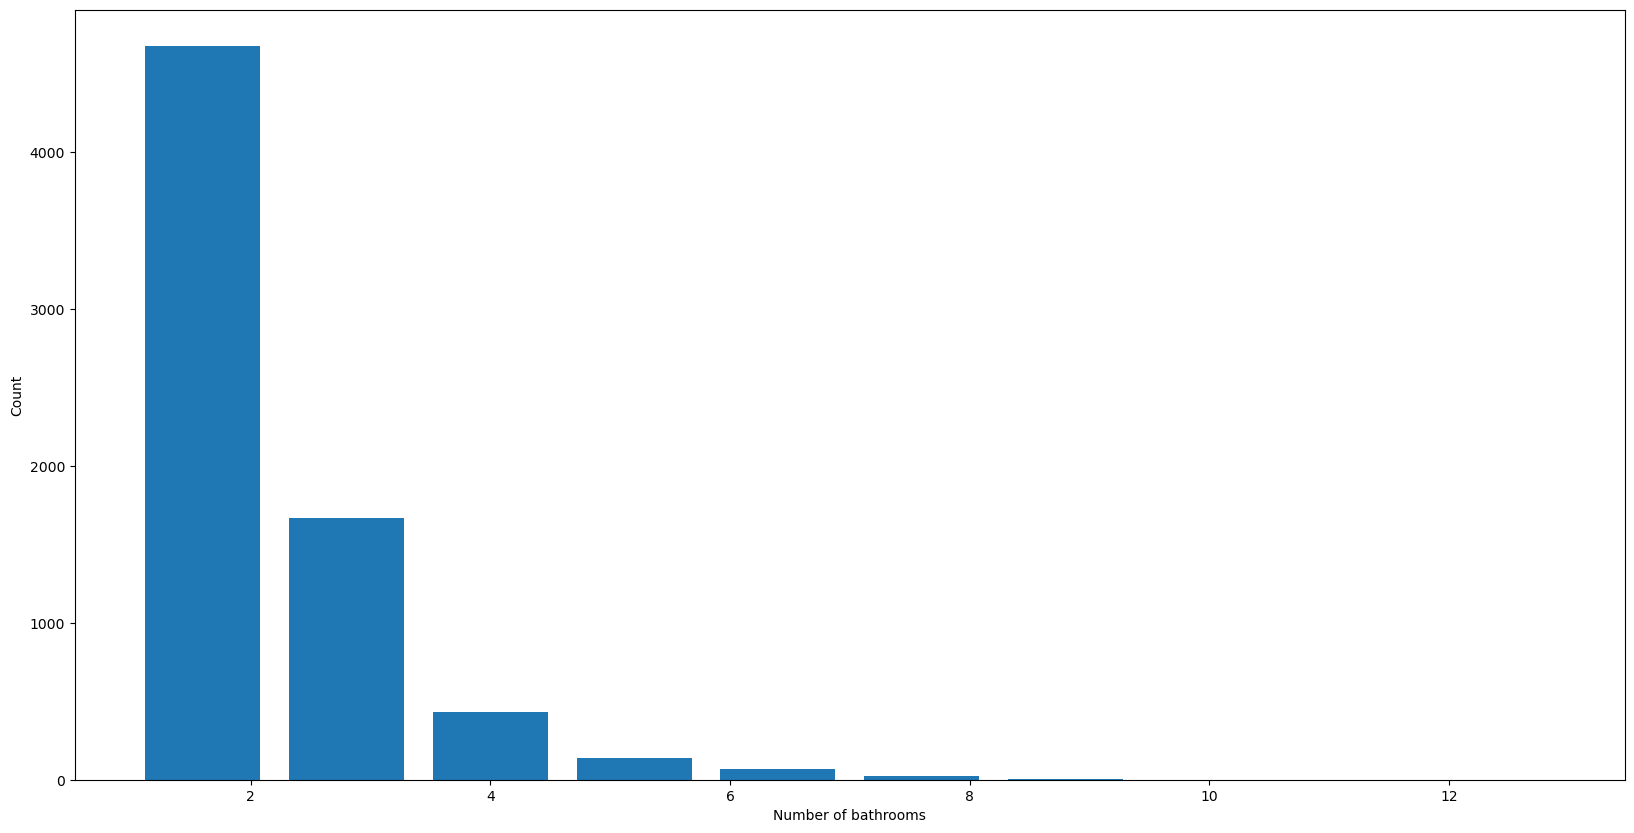

In [42]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [43]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9267,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [44]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6443,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8082,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [45]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6947, 8)

In [46]:
df9.head(2)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491


In [47]:
df10 = df9.drop(['size','price_per_sqft','balcony'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [48]:
df10.shape

(6947, 5)

In [49]:
X = df10.drop(['location'],axis='columns')
X.head(3)

,total_sqft,bath,price,bhk
0,2850.0,4.0,428.0,4
1,1630.0,3.0,194.0,3
2,1875.0,2.0,235.0,3


In [50]:
csv_file_path = '/Users/administrator/Desktop/price/mypro/prediction_data.csv'  
prediction_df = pd.read_csv(csv_file_path)
prediction_df.drop('id', axis=1, inplace=True)

In [51]:
prediction_df

,bhk,bath,total_sqft,price
0,2,2,1200,53.344430
1,2,2,1200,53.344430
2,2,2,1200,71.125906
3,2,2,2800,225.975509
4,2,2,2800,225.975509
5,2,2,2800,225.975509
6,2,2,2800,225.975509


In [52]:
concatenated_df = pd.concat([X, prediction_df], ignore_index=True)

In [53]:
concatenated_df

,total_sqft,bath,price,bhk
0,2850.0,4.0,428.000000,4
1,1630.0,3.0,194.000000,3
2,1875.0,2.0,235.000000,3
3,1200.0,2.0,130.000000,3
4,1235.0,2.0,148.000000,2
...,...,...,...,...
6949,1200.0,2.0,71.125906,2
6950,2800.0,2.0,225.975509,2
6951,2800.0,2.0,225.975509,2
6952,2800.0,2.0,225.975509,2


In [54]:
X=concatenated_df.drop(['price'],axis='columns')

In [55]:
X

,total_sqft,bath,bhk
0,2850.0,4.0,4
1,1630.0,3.0,3
2,1875.0,2.0,3
3,1200.0,2.0,3
4,1235.0,2.0,2
...,...,...,...
6949,1200.0,2.0,2
6950,2800.0,2.0,2
6951,2800.0,2.0,2
6952,2800.0,2.0,2


In [56]:
y = concatenated_df.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [57]:
len(y)

6954

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7205300868633474

In [60]:
import os

# Specify the directory and file path to save the model
directory = 'Desktop/price/mypro/savedmodels/'
os.makedirs(directory, exist_ok=True)
model_file_path = os.path.join(directory, 'model.joblib')

In [61]:
import joblib
joblib.dump(model, model_file_path)

['Desktop/price/mypro/savedmodels/model.joblib']